In [35]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [36]:
input_file = "out/results/rosmap959_major.json"

with open(input_file, "r") as f:
    data = json.load(f)
    
ct_dfs = []
ct_abundances = {}

for celltype in data.keys():
    print(f"Processing cell type: {celltype}")
    abundances = data[celltype]["abundances"].copy()
    del data[celltype]["abundances"]
    
    df = pd.DataFrame(data[celltype]).T
    df["Major"] = True
    df["Celltype"] = celltype
    df["Fold"] = df.index
    ct_dfs.append(df)
    ct_abundances[celltype] = abundances
    
ct_df = pd.concat(ct_dfs, ignore_index=True)
ct_df

Processing cell type: Astrocytes
Processing cell type: Excitatory_neurons
Processing cell type: Immune_cells
Processing cell type: Inhibitory_neurons
Processing cell type: Oligodendrocytes


,accuracy,precision,recall,f1,roc_auc,Major,Celltype,Fold
0,0.678571,0.650000,0.866667,0.742857,0.830769,True,Astrocytes,0
1,0.857143,0.875000,0.875000,0.875000,0.927083,True,Astrocytes,1
2,0.785714,0.812500,0.812500,0.812500,0.786458,True,Astrocytes,2
3,0.821429,0.823529,0.875000,0.848485,0.864583,True,Astrocytes,3
4,0.777778,0.800000,0.800000,0.800000,0.844444,True,Astrocytes,4
5,0.714286,0.705882,0.800000,0.750000,0.717949,True,Excitatory_neurons,0
6,0.821429,0.823529,0.875000,0.848485,0.901042,True,Excitatory_neurons,1
7,0.678571,0.684211,0.812500,0.742857,0.703125,True,Excitatory_neurons,2
8,0.857143,0.875000,0.875000,0.875000,0.895833,True,Excitatory_neurons,3
9,0.740741,0.750000,0.800000,0.774194,0.827778,True,Excitatory_neurons,4


C:\Users\timov\AppData\Local\Temp\ipykernel_49096\2569891471.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\timov\AppData\Local\Temp\ipykernel_49096\2569891471.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\timov\AppData\Local\Temp\ipykernel_49096\2569891471.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\timov\AppData\Local\Temp\ipykernel_49096\2569891471.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set

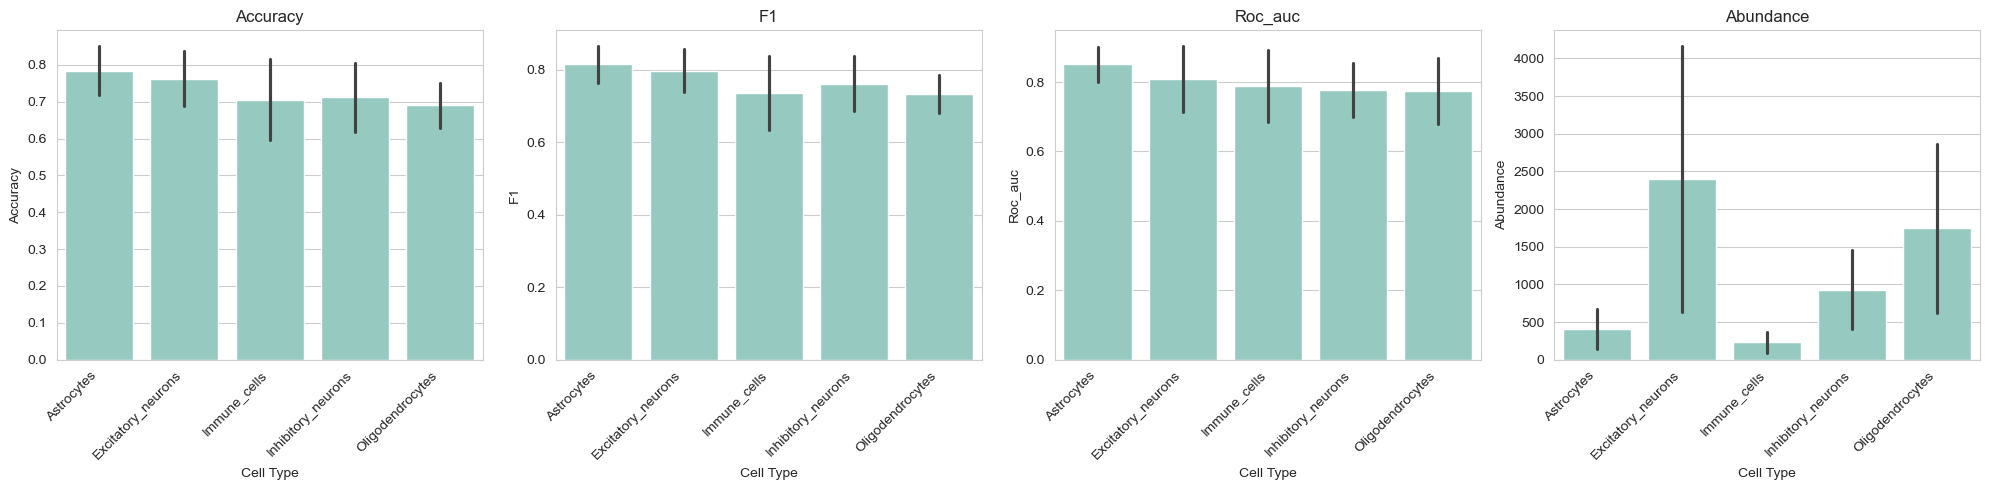

In [37]:
# barplot, with a bar per cell type. separate plots for major / minor
# four panels, for acc, f1, auroc, and abundance
# for the scores, average across folds and show standard deviation as error bar. 
# for the abundance, show the mean and standard deviation across the values in the abundances.

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, metric in enumerate(["accuracy", "f1", "roc_auc"]):
    ax = axs[i]
    
    sns.barplot(data=ct_df, x="Celltype", y=metric, ax=ax, errorbar="sd")
    ax.set_title(metric.capitalize())
    ax.set_xlabel("Cell Type")
    ax.set_ylabel(metric.capitalize())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    
# abundance
abundance_df = pd.DataFrame.from_dict(ct_abundances, orient="index").reset_index()
abundance_df.columns = ["Celltype"] + list(abundance_df.columns[1:])
abundance_df = abundance_df.melt(id_vars=["Celltype"], var_name="Fold", value_name="Abundance")

sns.barplot(data=abundance_df, x="Celltype", y="Abundance", ax=axs[3], errorbar="sd")
axs[3].set_title("Abundance")
axs[3].set_xlabel("Cell Type")
axs[3].set_ylabel("Abundance")
axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()


plt.show()